# Chocolate Sales Data
In this notebook I will do an exploratory data analysis (EDA) for chocolate sales data and later discover how I will leverage the data to make business insights, predictions or any notable findings. Quoting from the author of the data, here are some notes regarding the data collection methodology:
- Data was aggregated from chocolate retailers and online marketplaces.
- Only confirmed transactions were included to ensure accuracy.
- Revenue values reflect final prices after applying discounts, if any.

*Source*: [Chocolate Sales Data 📊🍫](https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales/data), authored by: [Atharva Soundankar](https://www.kaggle.com/atharvasoundankar)

### 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
import warnings

### 2. Read the CSV File and Import the Data as a Pandas Dataframe

In [2]:
df = pd.read_csv('/home/jasonzelin/data-analytics-portfolio/chocolate_sales_data/data/chocolate_sales.csv')

### 3. Start the EDA

Identify the shape and data types of each column existing in the dataframe

In [3]:
print("The shape of the data is ", df.shape)
print("The data types of each column are as below:", df.dtypes)

The shape of the data is  (1094, 6)
The data types of each column are as below: Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object


Convert column **'Date'** to pandas readable **date** format & column **'Amount'** to float for data processing. I also add the column **'Average Box Value'** to help with later analysis & insight discovery.

In [4]:
warnings.filterwarnings("ignore")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='raise')
df['Amount'] = df['Amount'].str.replace('(\$)|(\s+)|(,)', '', regex=True).astype('float64')
df['Average Box Value'] = df['Amount'] / df['Boxes Shipped']
df

<positron-console-cell-4>:3: SyntaxWarning: invalid escape sequence '\$'


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Average Box Value
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,74.375000
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,13.653251
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,55.117647
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,2.645161
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,5.432292


Check for missing values and fill it with median.

In [5]:
print("Missing values:\n", df.isnull().sum()/df.shape[0])

Missing values:
 Sales Person         0.0
Country              0.0
Product              0.0
Date                 0.0
Amount               0.0
Boxes Shipped        0.0
Average Box Value    0.0
dtype: float64


No missing values, hence no need to fill anything with median.

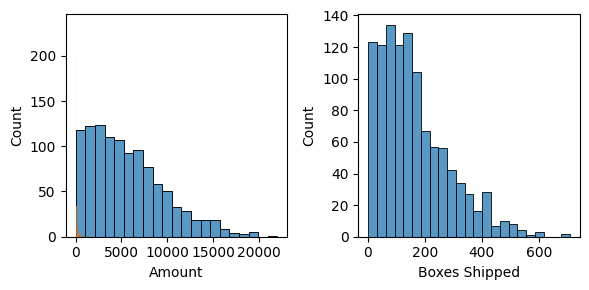

In [6]:
# Creating distribution plots
numeric_columns = df.select_dtypes(include=["number"]).columns.tolist()

# Create subplots: 4 row, 5 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
r = 0
c = 0
for i in numeric_columns:
    sns.histplot(data=df, x=i, ax=axes[c])
    if (c + 1) % 2 == 0:
        r = r + 1
        c = 0
    else:
        c = c + 1

plt.tight_layout()
plt.show()

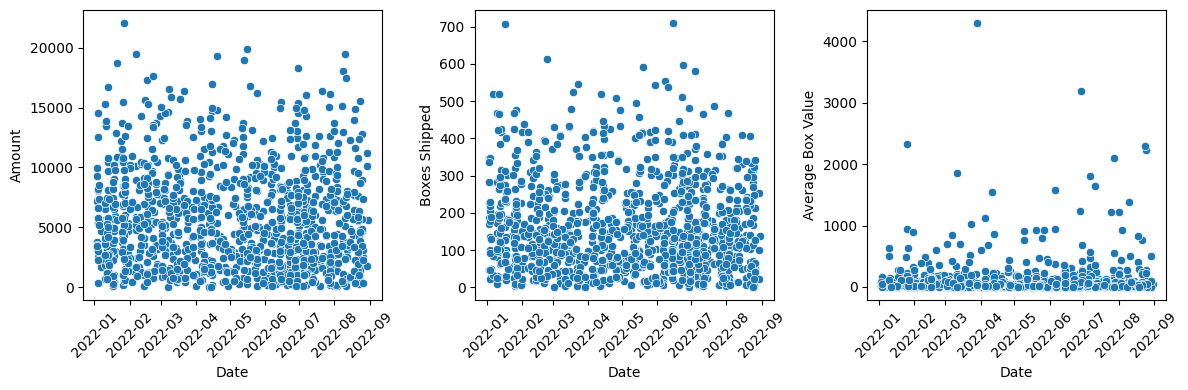

In [8]:
# Creating distribution plots
numeric_columns = df.select_dtypes(include=["number"]).columns.tolist()

# Create subplots: 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
r = 0
c = 0
for i in numeric_columns:
    sns.scatterplot(data=df, x='Date', y=i, ax=axes[c])
    if (c + 1) % 3 == 0:
        r = r + 1
        c = 0
    else:
        c = c + 1

# Rotate date labels on all plots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

As it can be observed from the scatter plot above, the amount and numbers of box shipped do not have a specific pattern over time. To confirm my hypothesis further, I summed the values with daily aggregation to check whether the values actually have no pattern.

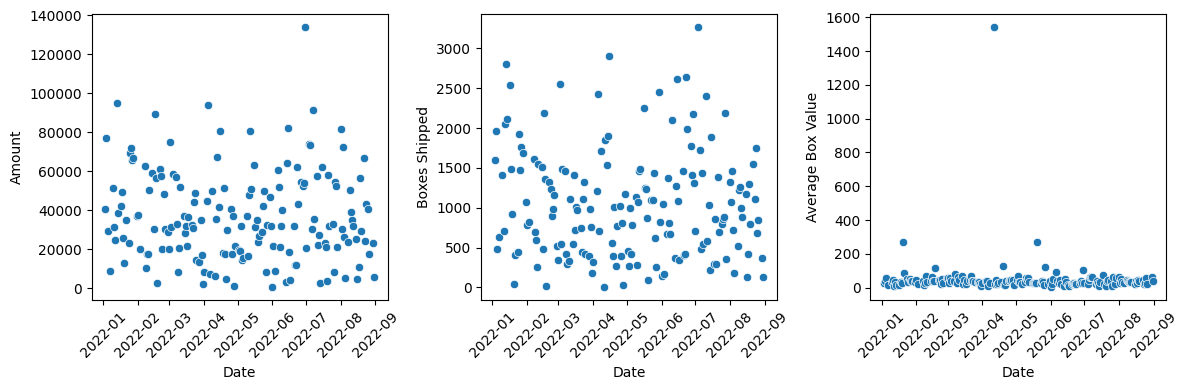

In [22]:
df_date_sum = df.groupby(by='Date').sum()[numeric_columns].reset_index()
df_date_sum['Average Box Value'] = df_date_sum['Amount'] / df_date_sum['Boxes Shipped']

# Create subplots: 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
r = 0
c = 0
for i in numeric_columns:
    sns.scatterplot(data=df_date_sum, x='Date', y=i, ax=axes[c])
    if (c + 1) % 3 == 0:
        r = r + 1
        c = 0
    else:
        c = c + 1

# Rotate date labels on all plots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

After aggregating the data into daily sums, there are still no visual pattern apart from a few outliers. Next, I am going to do descriptive analysis for the categorical columns to search for interesting insights.

In [ ]:
df_country_sum = df.groupby(by=['Date','Country']).sum()[numeric_columns].reset_index()
df_country_sum['Average Box Value'] = df_country_sum['Amount'] / df_country_sum['Boxes Shipped']

# Create subplots: 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
r = 0
c = 0

for i in numeric_columns:
    sns.violinplot(data=df_country_sum, x='Country', y=i, ax=axes[c], hue='Country')
    if (c + 1) % 3 == 0:
        r = r + 1
        c = 0
    else:
        c = c + 1

# Rotate date labels on all plots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

,Date,Country,Amount,Boxes Shipped,Average Box Value
0,2022-01-03,Australia,3745.0,170,22.029412
1,2022-01-03,Canada,10682.0,684,15.616959
2,2022-01-03,UK,22561.0,695,32.461871
3,2022-01-03,USA,3437.0,46,74.717391
4,2022-01-04,Australia,14742.0,258,57.139535
...,...,...,...,...,...
636,2022-08-26,UK,9660.0,620,15.580645
637,2022-08-30,India,10122.0,100,101.220000
638,2022-08-30,New Zealand,11200.0,22,509.090909
639,2022-08-30,UK,1750.0,252,6.944444


In [ ]:
df_product_sum = df.groupby(by=['Date','Product']).sum()[numeric_columns].reset_index()
df_product_sum['Average Box Value'] = df_product_sum['Amount'] / df_product_sum['Boxes Shipped']

# Create subplots: 3 columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
r = 0
c = 0

for i in numeric_columns:
    sns.violinplot(data=df_product_sum, x='Product', y=i, ax=axes[r], hue='Product')
    if (c + 1) % 1 == 0:
        r = r + 1
        c = 0
    else:
        c = c + 1

# Rotate date labels on all plots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

#
axes[1].set_ylim(0,1300)

plt.tight_layout()
plt.show()

,Date,Product,Amount,Boxes Shipped,Average Box Value
0,2022-01-03,99% Dark & Pure,9310.0,282,33.014184
1,2022-01-03,Caramel Stuffed Bars,7154.0,348,20.557471
2,2022-01-03,Raspberry Choco,3437.0,46,74.717391
3,2022-01-03,Smooth Sliky Salty,3745.0,170,22.029412
4,2022-01-03,Spicy Special Slims,3528.0,336,10.500000
...,...,...,...,...,...
933,2022-08-26,Raspberry Choco,7357.0,341,21.574780
934,2022-08-30,85% Dark Bars,11200.0,22,509.090909
935,2022-08-30,Almond Choco,10122.0,100,101.220000
936,2022-08-30,Eclairs,1750.0,252,6.944444


In [ ]:
df_salesperson_sum = df.groupby(by=['Date','Sales Person']).sum()[numeric_columns].reset_index()
df_salesperson_sum['Average Box Value'] = df_salesperson_sum['Amount'] / df_salesperson_sum['Boxes Shipped']

# Create subplots: 3 columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
r = 0
c = 0

for i in numeric_columns:
    sns.violinplot(data=df_salesperson_sum, x='Sales Person', y=i, ax=axes[r], hue='Sales Person')
    if (c + 1) % 1 == 0:
        r = r + 1
        c = 0
    else:
        c = c + 1

# Rotate date labels on all plots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

,Date,Sales Person,Amount,Boxes Shipped,Average Box Value
0,2022-01-03,Andria Kimpton,7154.0,348,20.557471
1,2022-01-03,Camilla Castle,9982.0,187,53.379679
2,2022-01-03,Ches Bonnell,3269.0,226,14.464602
3,2022-01-03,Dotty Strutley,12747.0,328,38.862805
4,2022-01-03,Marney O'Breen,7273.0,506,14.373518
...,...,...,...,...,...
947,2022-08-26,Wilone O'Kielt,301.0,65,4.630769
948,2022-08-30,Beverie Moffet,11200.0,22,509.090909
949,2022-08-30,Husein Augar,1750.0,252,6.944444
950,2022-08-30,Jehu Rudeforth,10122.0,100,101.220000


The descriptive analysis on the categorical data also shows no striking features coming from the chocolate sales data. However, top scorer of each category and each metrics could be presented in the 3 by 3 charts below.

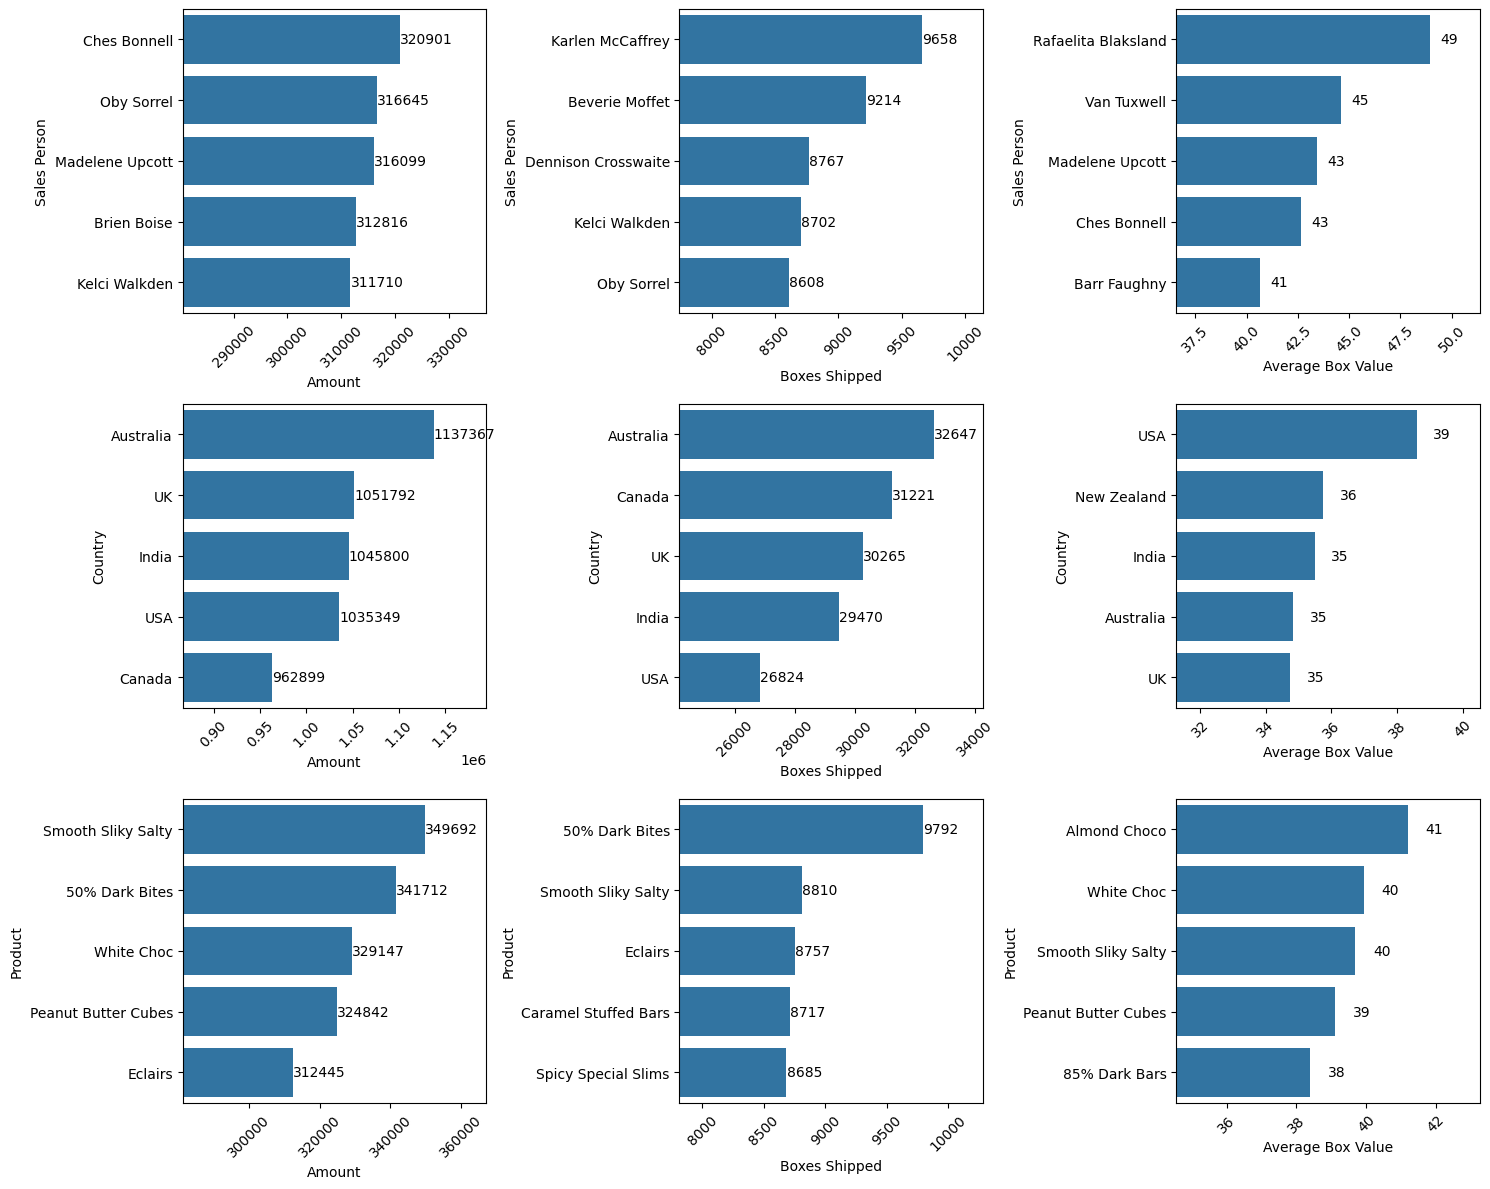

In [21]:
# Create subplots: 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
r = 0
c = 0

aggregator_columns = ['Sales Person', 'Country', 'Product']
for a in aggregator_columns:
    looping_columns = list(numeric_columns)
    looping_columns.append(a)
    df_temp = df[looping_columns].groupby(by=a).sum().reset_index()
    df_temp['Average Box Value'] = df_temp['Amount'] / df_temp['Boxes Shipped']
    for n in numeric_columns:
        df_vis = df_temp[[a, n]].sort_values(by=n, axis=0, ascending=False).head(5).reset_index(drop=True)
        sns_bar = sns.barplot(data=df_vis, x=n, y=a, ax=axes[r,c])
        min_x = df_vis[n].min() * 0.9
        axes[r][c].set_xlim(min_x, None) # Add data labels
        for bar in sns_bar.patches:
            width = bar.get_width()
            axes[r][c].text(
                x=width + 0.5,                      # Slightly after the bar
                y=bar.get_y() + bar.get_height()/2, # Vertically center the label
                s=f'{width:.0f}',
                va='center'
            )
        c = c + 1
    r = r + 1
    c = 0

# Rotate date labels on all plots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
    

### 5. Conclusion
### Insights & Thoughts on the Data of Chocolate Sales
The data of chocoolate sales that is used in this EDA has not much of interesting features to dive deeper into. However, it could be a learning that in reality, not all data can be used to generate insights for immediate decision making. In many cases, data serves the purpose of simply spreading awareness of the situation that a business or something.

For data analysts that are beginning their learning journey, this data could be a decent stepping stone in visualizing the data and also descriptive analysis.